In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta
import math
import missingno as msno
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/Users/joshitha/Downloads/Data.xlsx', skiprows=[1])

In [3]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
new_df = df[['Q11 CODE', 'Q12 CODE','Q13 CODE', 'Q14 CODE', 'Q16 CODE', 'Q17 CODE', 'Q18 CODE','Q19 CODE', 'Q20 CODE', 'Q22 CODE', 'Q23 CODE','Q24 CODE', 'Q25 CODE', 'Q26 CODE','Q27 CODE', 'Q28 CODE', 'Q29 CODE', 'Q30 CODE']]

# Instantiate
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(new_df)
df_scaled.shape

(363, 18)

In [4]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['Q11 CODE', 'Q12 CODE','Q13 CODE', 'Q14 CODE', 'Q16 CODE', 'Q17 CODE', 'Q18 CODE','Q19 CODE', 'Q20 CODE', 'Q22 CODE', 'Q23 CODE','Q24 CODE', 'Q25 CODE', 'Q26 CODE','Q27 CODE', 'Q28 CODE', 'Q29 CODE', 'Q30 CODE']
df_scaled.head()

,Q11 CODE,Q12 CODE,Q13 CODE,Q14 CODE,Q16 CODE,Q17 CODE,Q18 CODE,Q19 CODE,Q20 CODE,Q22 CODE,Q23 CODE,Q24 CODE,Q25 CODE,Q26 CODE,Q27 CODE,Q28 CODE,Q29 CODE,Q30 CODE
0,-1.032427,0.806652,0.506976,0.346406,-1.470794,-2.451908,-1.604691,-1.464918,-2.702288,-1.189570,3.797906,-1.021376,0.32979,-1.287105,0.953320,-0.976022,-2.631852,-3.143574
1,-1.032427,0.806652,0.506976,0.346406,1.242793,0.461488,0.244524,0.837096,-0.780779,-1.189570,-0.696438,-0.157135,-0.65147,1.133720,-0.447713,-0.976022,-0.261226,0.791313
2,-1.032427,0.806652,0.506976,0.346406,0.564396,-2.451908,1.169132,0.837096,1.140731,-1.189570,-0.696438,-1.021376,-0.65147,1.133720,-0.447713,-1.754694,-0.261226,0.791313
3,-0.131535,0.806652,0.506976,0.346406,1.242793,0.461488,-0.680083,0.837096,1.140731,1.763004,-0.696438,-1.021376,-0.65147,-2.094047,-0.447713,1.359995,0.924087,0.791313
4,-1.032427,0.806652,0.506976,0.346406,-0.114001,0.461488,-0.680083,0.837096,0.179976,0.286717,0.427148,0.707107,0.32979,-0.480164,0.953320,0.581323,0.924087,-0.192408


In [6]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df_scaled)

kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(df_scaled)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,4)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,121,79,94,69


In [8]:
kmeans.labels_

array([1, 0, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2,
       0, 1, 1, 1, 3, 0, 2, 0, 3, 0, 0, 2, 1, 2, 2, 0, 0, 2, 1, 2, 0, 2,
       1, 2, 0, 1, 1, 0, 3, 1, 3, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 1, 3,
       1, 2, 1, 3, 0, 1, 3, 2, 0, 2, 1, 3, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 3, 3, 3, 0, 0, 1, 0, 3, 0, 0, 3, 2, 0, 0, 3, 1,
       0, 0, 3, 3, 3, 0, 2, 2, 0, 3, 3, 0, 0, 2, 2, 2, 0, 1, 0, 0, 3, 2,
       0, 3, 2, 0, 0, 1, 1, 2, 3, 1, 0, 3, 0, 2, 1, 3, 1, 1, 2, 3, 0, 0,
       0, 3, 1, 3, 2, 0, 3, 2, 0, 0, 0, 3, 3, 0, 1, 2, 2, 2, 2, 0, 2, 3,
       3, 3, 0, 0, 2, 3, 2, 0, 0, 1, 3, 0, 2, 0, 3, 1, 0, 1, 3, 3, 3, 1,
       2, 2, 0, 2, 2, 2, 0, 1, 3, 2, 2, 2, 1, 0, 3, 3, 3, 0, 1, 2, 2, 1,
       3, 0, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 3, 1, 2, 0, 1, 3, 0,
       0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 3, 0, 3,
       0, 0, 1, 1, 3, 0, 0, 2, 3, 0, 2, 0, 3, 3, 2, 1, 0, 0, 0, 2, 2, 0,
       0, 2, 3, 1, 3, 1, 1, 1, 3, 3, 1, 0, 3, 1, 3,

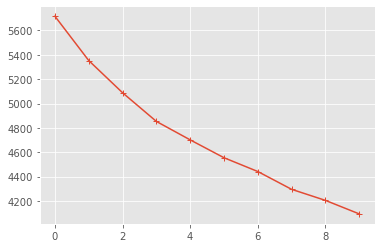

In [9]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd, marker="+")

In [10]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [11]:
clusters=pd.concat([new_df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()
clusters.to_excel('file.xlsx')

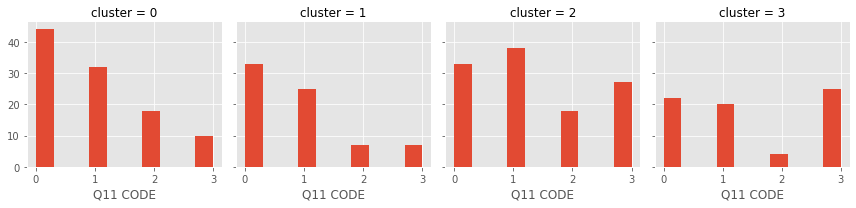

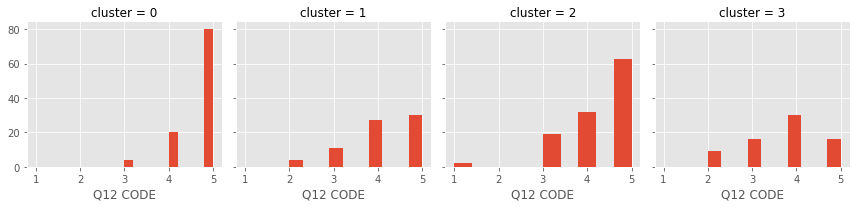

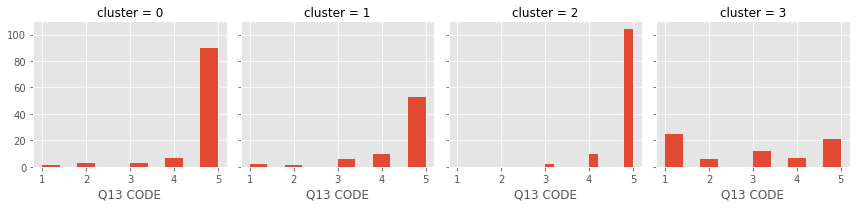

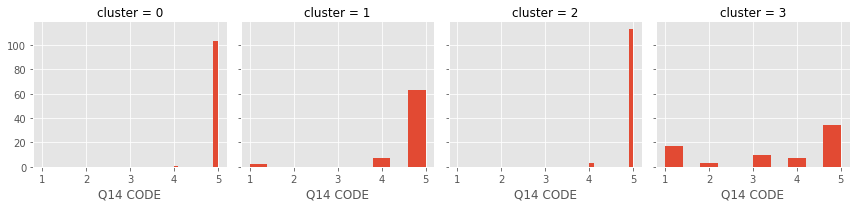

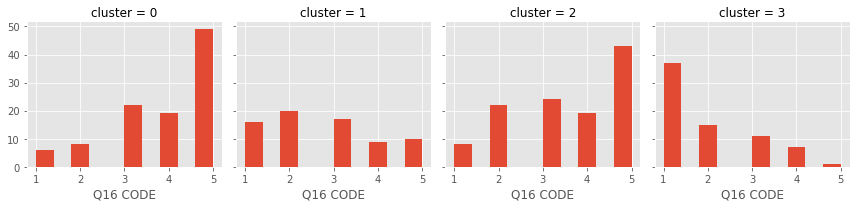

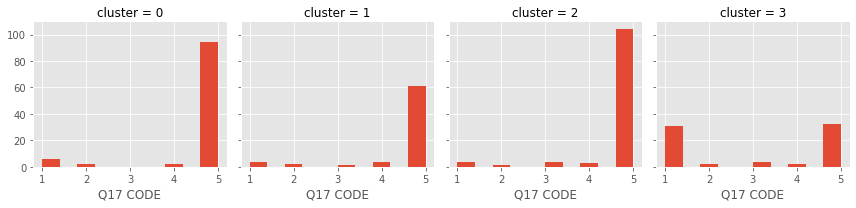

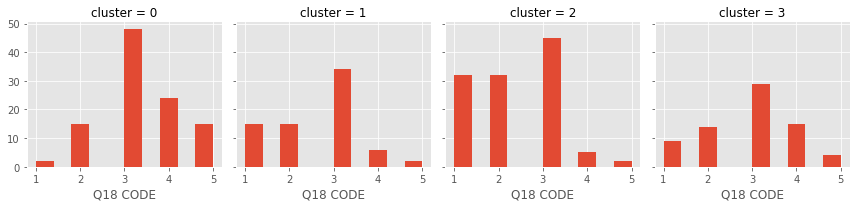

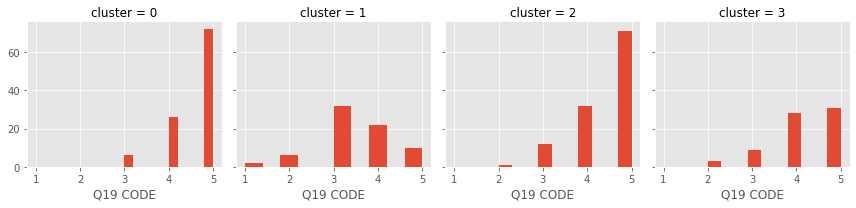

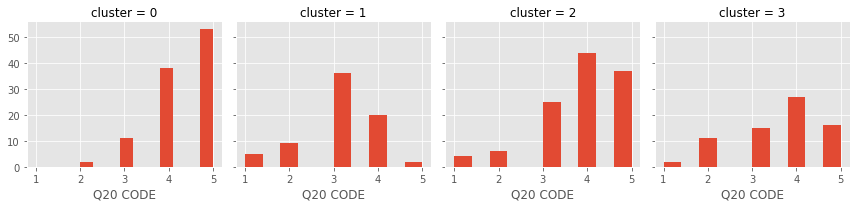

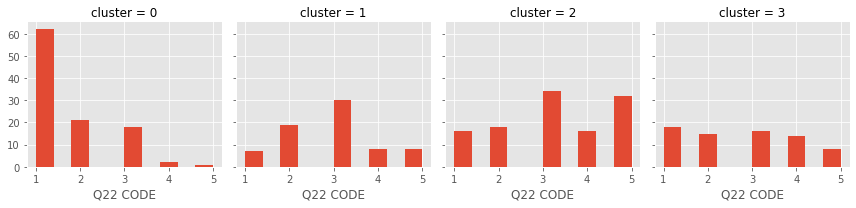

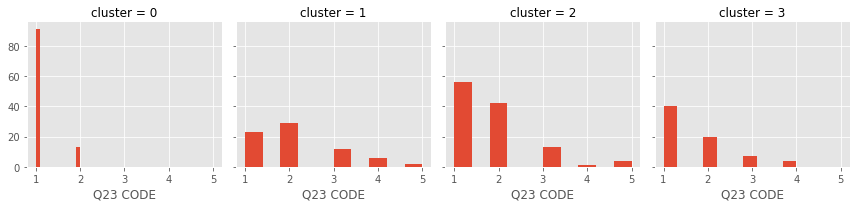

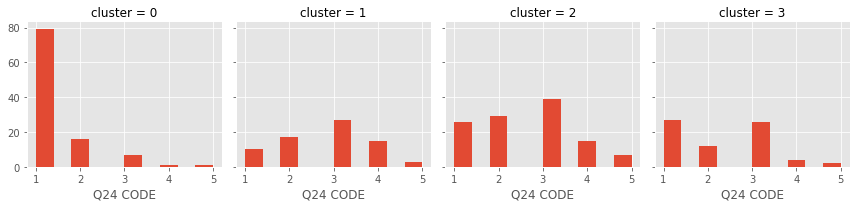

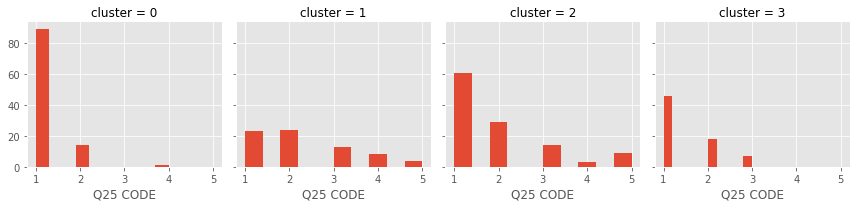

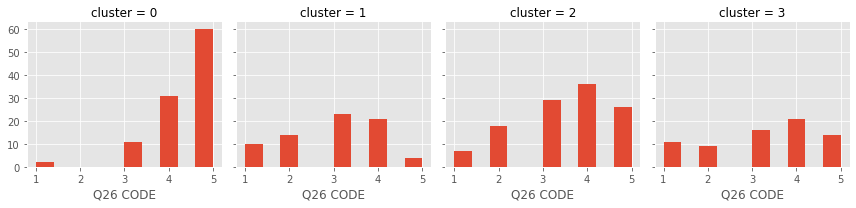

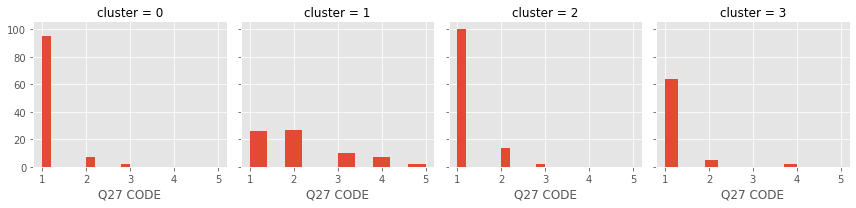

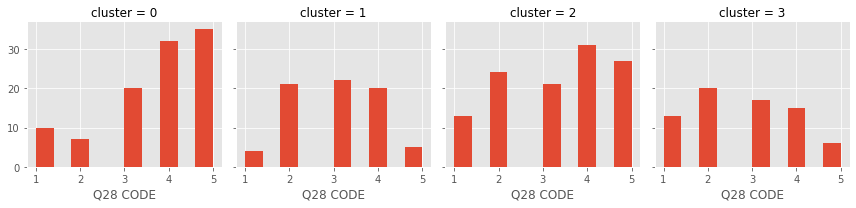

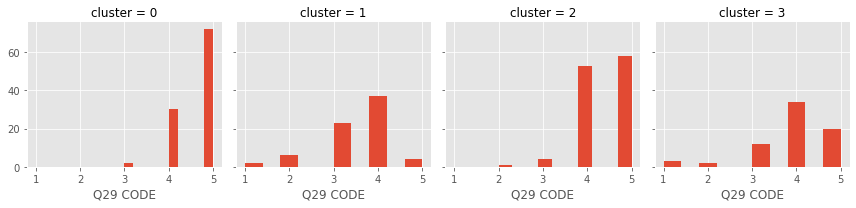

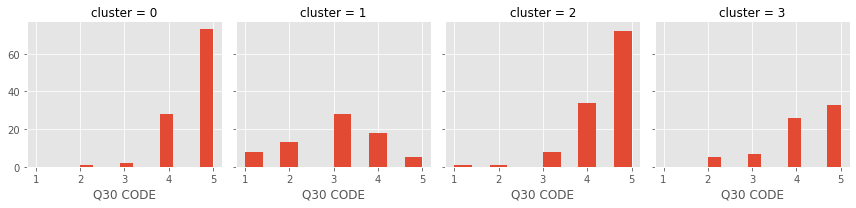

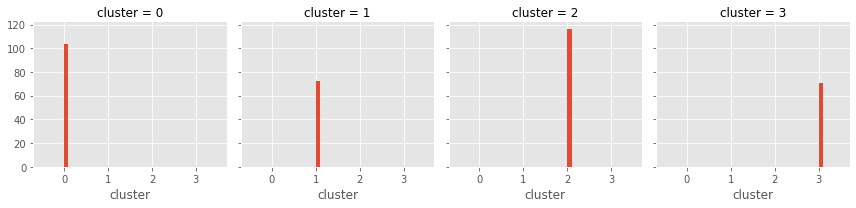

In [12]:
for c in clusters: 
    grid= sns.FacetGrid(clusters, col='cluster') 
    grid.map(plt.hist, c)
    grid.savefig("output.png")

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
X= np.asarray(df_scaled)
dist = 1 - cosine_similarity(X)


pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(363, 2)

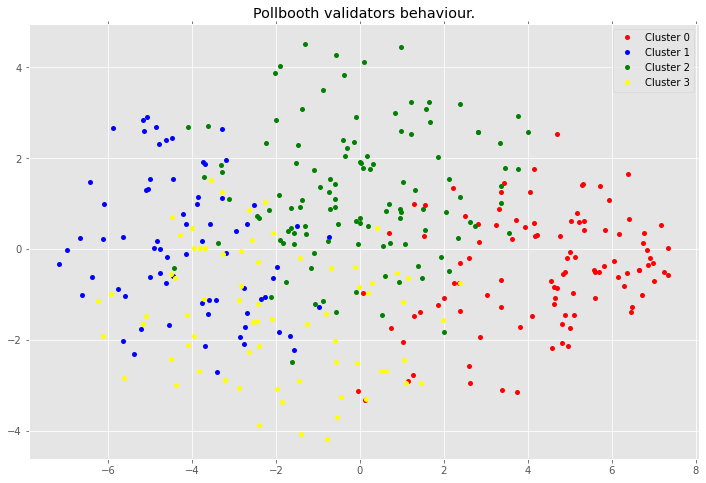

In [14]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange'}

names = {0: 'Cluster 0', 
         1: 'Cluster 1', 
         2: 'Cluster 2', 
         3: 'Cluster 3', 
         4: 'Cluster 4'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(12, 8)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Pollbooth validators behaviour.")
plt.show()
fig.savefig('clusters.png')